# Diabetes Prediction - ML-Model

#### Load preprocessed data, Build, Select, Train and Evaluate Models

In [1]:
## basic package
import pandas as pd
import numpy as np
import pickle

## Customized Function
from helpers import *
print("Libraries Imported ..")

Libraries Imported ..


## 1. Load Preprocessed Dataset

In [2]:
raw_data = pd.read_csv("../data/diabetes.csv")
cleaned_data = pd.read_csv("../data/clean_data.csv")
scaled_data = pd.read_csv("../data/scaled_data.csv")

print("raw_data Shape     :",raw_data.shape)
print("cleaned_data Shape :",cleaned_data.shape)
print("scaled_data Shape  :",scaled_data.shape)

raw_data Shape     : (768, 9)
cleaned_data Shape : (768, 9)
scaled_data Shape  : (768, 9)


### First rows raw data

In [3]:
raw_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### First rows cleaned data

In [4]:
cleaned_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


### First rows Scaled data

In [5]:
scaled_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1


## => Let use cleaned dataset 

In [6]:
df = cleaned_data

### 2. Splitting the data into training, testing, and validation sets

In [7]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
pd.DataFrame({"Training": [X_train.shape, y_train.shape], 
              "Testing":[X_test.shape, y_test.shape]}, index=['Features(X)', 'Target(y)'])

,Training,Testing
Features(X),"(614, 8)","(154, 8)"
Target(y),"(614,)","(154,)"


## 3. Model Selection

In [9]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [10]:
models = [
    ('LR', LogisticRegression(), 10),
    ('LDA', LinearDiscriminantAnalysis(), 10),
    ('KNN', KNeighborsClassifier(), 10),
    ('DT', DecisionTreeClassifier(),10),
    ('NB', GaussianNB(),10),
    ('SVM', SVC(), 10),
    ('RFC', RandomForestClassifier(),10),
    ('ETC', ExtraTreesClassifier(),10),
   
]

# Train model
ress = model_select_class(X, y,models)
ress = ress.sort_values(by=["Train-Accuracy", "ROC", "Precision", "Recall","F1-Score"], ascending=False)#"Train-Accuracy",
ress

C:\Users\rkd-pc\anaconda3\envs\p01ml_venv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Agorithm,Train-Accuracy,ROC,Precision,Recall,F1-Score,Test-Accuracy,"""GEN. ERROR"""
6,RFC,100.00,73.02,75.56,57.63,65.39,76.62,23.38
3,DT,100.00,67.56,60.34,59.32,59.83,69.48,30.52
7,ETC,100.00,64.67,65.00,44.07,52.53,69.48,30.52
2,KNN,81.76,65.31,63.64,47.46,54.37,69.48,12.28
0,LR,78.01,67.73,69.05,49.15,57.42,72.08,5.93
5,SVM,77.85,64.23,69.70,38.98,50.00,70.13,7.72
1,LDA,77.04,68.79,72.50,49.15,58.58,73.38,3.66
4,NB,75.57,71.97,72.34,57.63,64.15,75.32,0.25


In [11]:
#ress.to_csv("../figures/scaled_dt_model_select")

### 3.1. Models Ranking

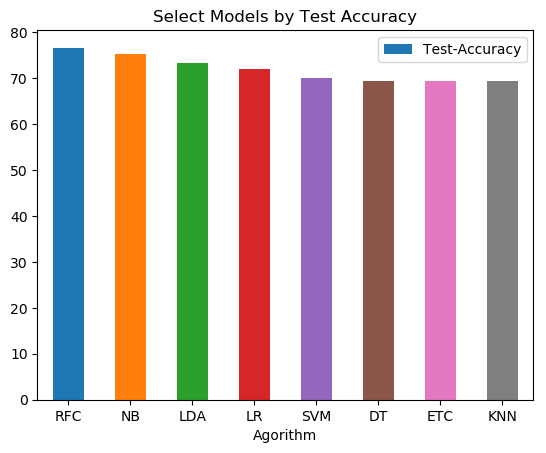

In [12]:
ress =ress.sort_values(by=['Test-Accuracy'], ascending=False)
ress.plot.bar(x='Agorithm', y='Test-Accuracy', rot=0)
plt.title('Select Models by Test Accuracy')
plt.savefig('../figures/select_models_by_test_accuracy.png', bbox_inches='tight')
plt.show()

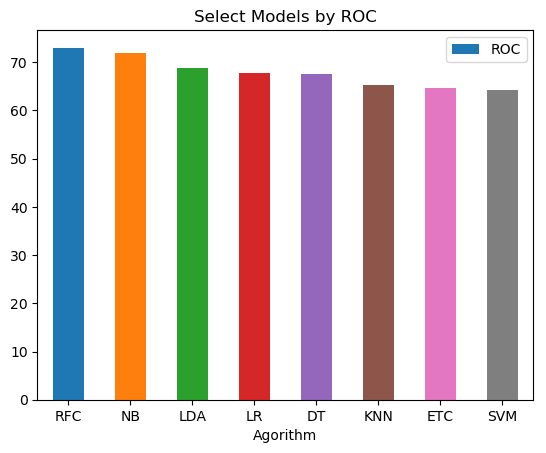

In [13]:
ress =ress.sort_values(by=['ROC'], ascending=False)
ress.plot.bar(x='Agorithm', y='ROC', rot=0)
plt.title('Select Models by ROC')
plt.savefig('../figures/select_models_by_roc.png', bbox_inches='tight')
plt.show()

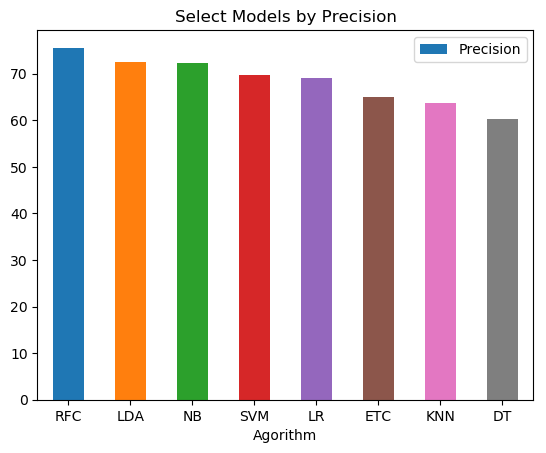

In [14]:
ress =ress.sort_values(by=['Precision'], ascending=False)
ress.plot.bar(x='Agorithm', y='Precision', rot=0)
plt.title('Select Models by Precision')
plt.savefig('../figures/select_models_by_precision.png', bbox_inches='tight')
plt.show()

> RFC, LDA and NB  are doing better according to the precision metric

## 3.2. Train 5 Best Models with best parameters

> Hyperparameter Tuning

### method 1

In [15]:
algo_name = 'LDA'
algorithm = LinearDiscriminantAnalysis()
hyperparams={'solver': ['svd', 'lsqr', 'eigen'],  
          'store_covariance': [True,False]}
cv = 5
lda = hyperparam_tuning(X_train, y_train, algo_name, algorithm, hyperparams, cv)
    
algo_name = 'RFC'
algorithm = RandomForestClassifier()
hyperparams = {'n_estimators':list(range(99,101)),  
               'criterion':['gini', 'entropy'],
               'max_features':['auto', 'sqrt', 'log2']}
cv = 5
rfc = hyperparam_tuning(X_train, y_train, algo_name, algorithm, hyperparams, cv)

algo_name = 'NB'
algorithm = GaussianNB()
hyperparams = {'priors': [None],  
               'var_smoothing':[1e-12,1e-11, 1e-10,1e-9, 1e-8,1e-7,1e-6,1e-5]}
cv = 5
nb = hyperparam_tuning(X_train, y_train, algo_name, algorithm, hyperparams, cv)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.5s finished


In [16]:
print(lda)
print(rfc)
print(nb)

('LDA', {'solver': 'svd', 'store_covariance': True}, 5)
('RFC', {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 99}, 5)
('NB', {'priors': None, 'var_smoothing': 1e-05}, 5)


### method 2

In [17]:
algos = {
    'LDA' : {'model':LinearDiscriminantAnalysis(), 
             'params':{'solver': ['svd', 'lsqr', 'eigen'],  
                       'store_covariance': [True,False]}}, 

     'RFC' : {'model':RandomForestClassifier(),
             'params':{'n_estimators':list(range(99,101)),  
                        'criterion':['gini', 'entropy'],
                        'max_features':['auto', 'sqrt', 'log2']}},
     
    
    'NB' : {'model':GaussianNB(),
             'params':{'priors': [None],  
             'var_smoothing':[1e-12,1e-11, 1e-10,1e-9, 1e-8,1e-7,1e-6,1e-5]}}
    
}


In [18]:
hyperparam_tuning1(X,y, algos)

,model,best_score,best_params
0,LDA,0.775325,"{'solver': 'svd', 'store_covariance': True}"
1,RFC,0.777922,"{'criterion': 'entropy', 'max_features': 'auto..."
2,NB,0.764935,"{'priors': None, 'var_smoothing': 1e-05}"


## 3.3. Select the Best of the best Model

In [19]:
lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=True)
rfc = RandomForestClassifier(criterion='gini', max_features='log2', n_estimators=100)
nb = GaussianNB(priors=None, var_smoothing=1e-06)

#Fit models
lda.fit(X_train, y_train)
rfc.fit(X_train, y_train)
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-06)

### 3.3.1. ROC_curve and AUC

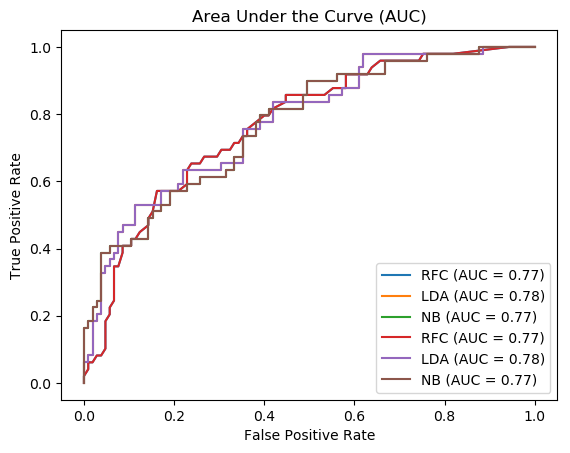

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn import datasets, metrics, model_selection

metrics.plot_roc_curve(rfc, X_test, y_test, ax = plt.gca(),name = "RFC")
metrics.plot_roc_curve(lda, X_test, y_test, ax = plt.gca(),name = "LDA")
metrics.plot_roc_curve(nb, X_test, y_test, ax = plt.gca(),name = "NB")

plt.title('Area Under the Curve (AUC)')
plt.savefig('../figures/area_nder_the_curve_auc.png', bbox_inches='tight')
plt.show()

### 3.3.2. Precision-Recall Curve

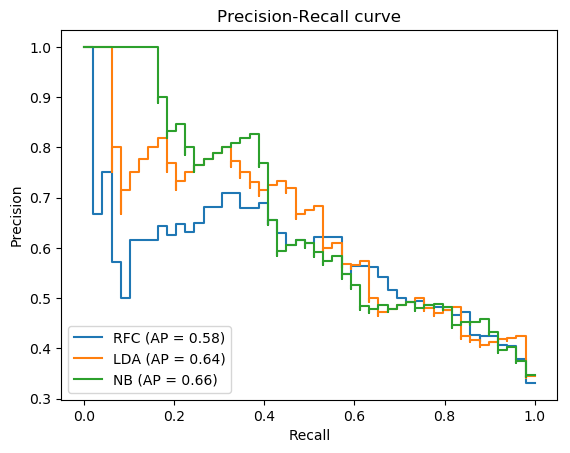

In [22]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, precision_score

plot_precision_recall_curve(rfc, X_test, y_test, ax = plt.gca(),name = "RFC")
plot_precision_recall_curve(lda, X_test, y_test, ax = plt.gca(),name = "LDA")
plot_precision_recall_curve(nb, X_test, y_test, ax = plt.gca(),name = "NB")

plt.title('Precision-Recall curve')
plt.savefig('../figures/precision_recall_curve.png', bbox_inches='tight')
plt.show()

### 3.3.3. Calibration Curve

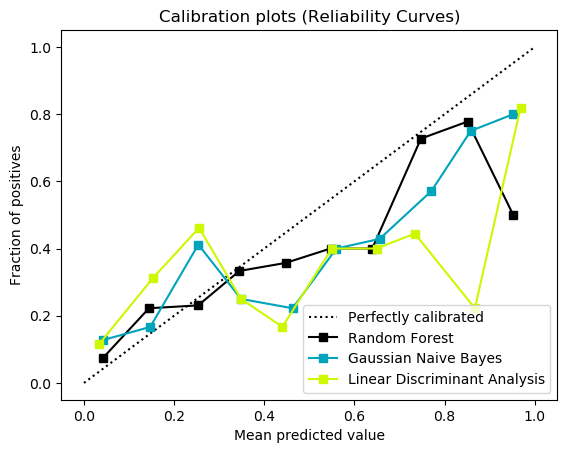

In [23]:
import scikitplot as skplt
rfc_probas = rfc.predict_proba(X_test)
nb_probas = nb.predict_proba(X_test)
lda_probas = lda.predict_proba(X_test)
#svm_scores = svm.decision_function(X_test)
probas_list = [rfc_probas, lda_probas, nb_probas]
clf_names = ['Random Forest', 'Gaussian Naive Bayes', 'Linear Discriminant Analysis']
skplt.metrics.plot_calibration_curve(y_test, probas_list, clf_names)
plt.savefig('../figures/calibration_plot.png', bbox_inches='tight')
plt.show()

### 3.3.4. Summary

In [25]:
lda_tr_ac, lda_te_ac, lda_prec = lda.score(X_train,y_train), lda.score(X_test,y_test), precision_score(y_test, lda.predict(X_test), average='macro')
rfc_tr_ac, rfc_te_ac, rfc_prec = rfc.score(X_train,y_train), rfc.score(X_test,y_test), precision_score(y_test, rfc.predict(X_test), average='macro')
nb_tr_ac, nb_te_ac, nb_prec = nb.score(X_train,y_train), nb.score(X_test,y_test), precision_score(y_test, nb.predict(X_test), average='macro')


best = pd.DataFrame({'Linear Discriminant Analysis':{'Train Accuracy':lda_tr_ac, 'Test Accuracy':lda_te_ac, 'Precision':lda_prec},
             'Random Forest':{'Train Accuracy':rfc_tr_ac, 'Test Accuracy':rfc_te_ac, 'Precision':rfc_prec},
             'Gaussian Naive Bayes':{'Train Accuracy':nb_tr_ac, 'Test Accuracy':nb_te_ac, 'Precision':nb_prec}}).T
best

,Precision,Test Accuracy,Train Accuracy
Linear Discriminant Analysis,0.715303,0.753247,0.778502
Random Forest,0.679038,0.720779,1.000000
Gaussian Naive Bayes,0.679038,0.720779,0.763844


In [26]:
#best.to_csv("../figures/scaled_dt_best_model_select")

>  According to Area Under the Curve (AUC), Precision-Recall Curve and Accuracy **Linear Discriminant Analysis** is the best model

# 4. Selected Model

## 4.1.  Train Method

### 4.1.1. Method 1 : Holdout

In [27]:

algo_and_hp = LinearDiscriminantAnalysis(solver='svd', store_covariance=True)
algo_name = "LDA"
pol = classify_ho1(algo_name, algo_and_hp, X, y)
pol

,Agorithm,Train-Accuracy,ROC,Precision,Recall,F1-Score,Test-Accuracy,GEN. ERROR
0,LDA,0.770358,68.79,72.5,49.15,58.58,0.733766,3.66


### 4.1.1. Method 2 : Cross-Validation

In [28]:
algorithm = LinearDiscriminantAnalysis()
gridsearchParams = {'solver': ['svd', 'lsqr', 'eigen'],  
          'store_covariance': [True,False]}
algo_name = "LDA"

In [29]:
classify_cv1(X, y, algo_name, algorithm, gridsearchParams, 5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


,Agorithm,Train-Accuracy,ROC,Precision,Recall,F1-Score,Test-Accuracy,GEN. ERROR
0,LDA,0.770358,68.79,72.5,49.15,58.58,0.733766,0.036592


## 4.2. Model Evaluation

### 4.2.1. Learning Curve

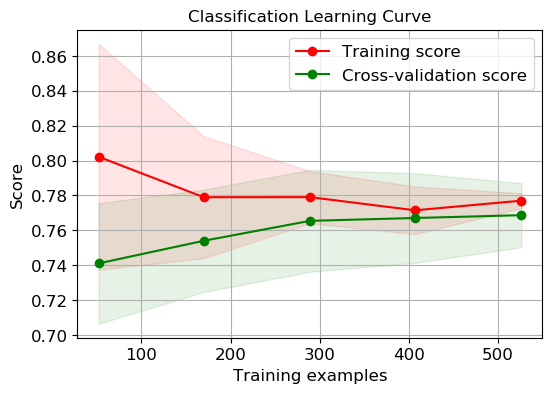

In [30]:
lda = LinearDiscriminantAnalysis(shrinkage = 'auto', solver = 'lsqr', store_covariance=True)
lda.fit(X_train, y_train)
skplt.estimators.plot_learning_curve(lda, X_train, y_train,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve");
plt.savefig('../figures/learning_curve.png', bbox_inches='tight')
plt.show()

### 4.2.2. Confusion Matrix

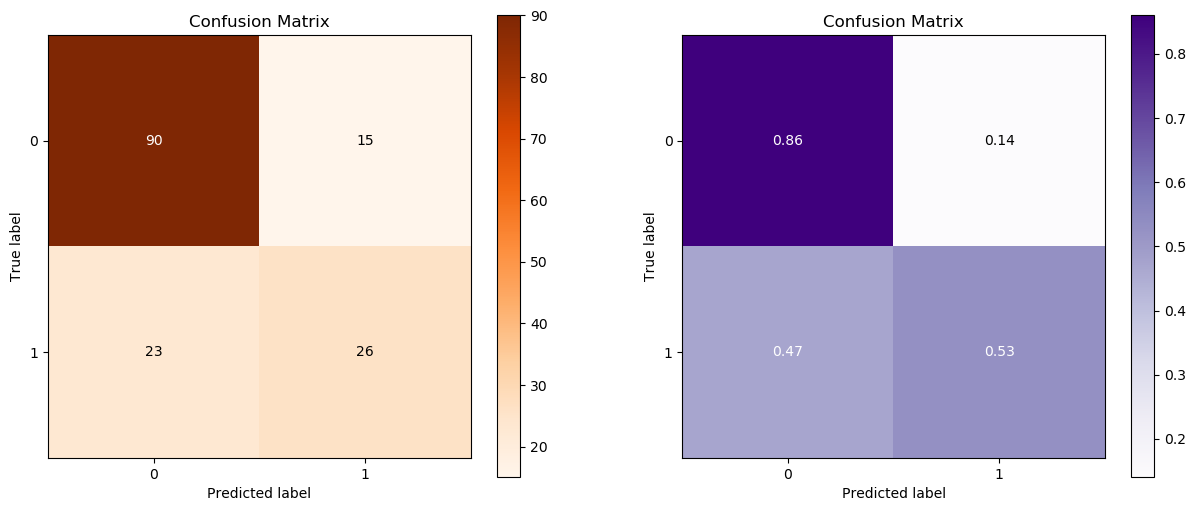

In [31]:
y_pred = lda.predict(X_test)
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);
plt.savefig('../figures/confusion_matrix.png', bbox_inches='tight')
plt.show()

### 4.2.3. ROC & Precision-Recall Curve

In [30]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

C:\Users\rkd-pc\anaconda3\envs\p01ml_venv\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\rkd-pc\anaconda3\envs\p01ml_venv\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<Figure size 500x600 with 0 Axes>

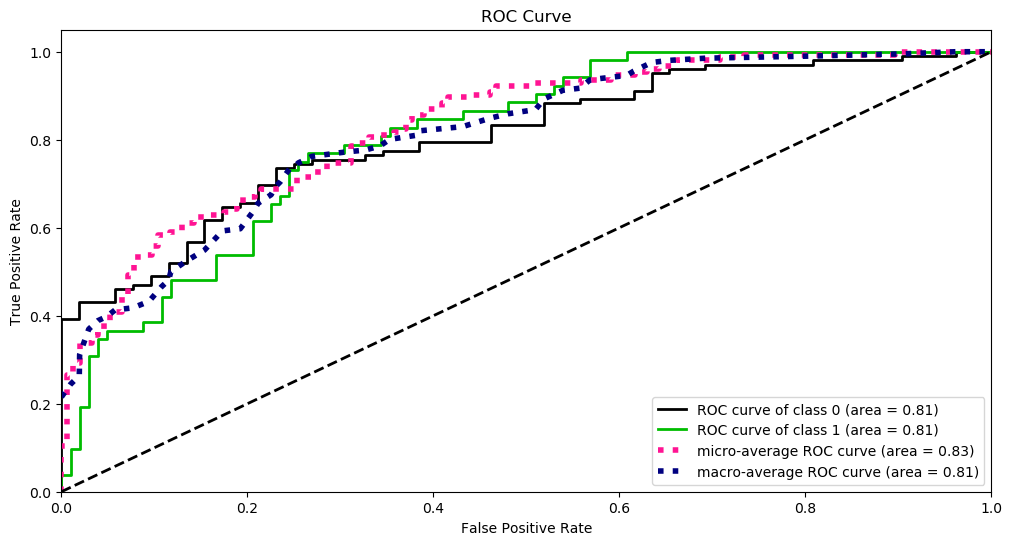

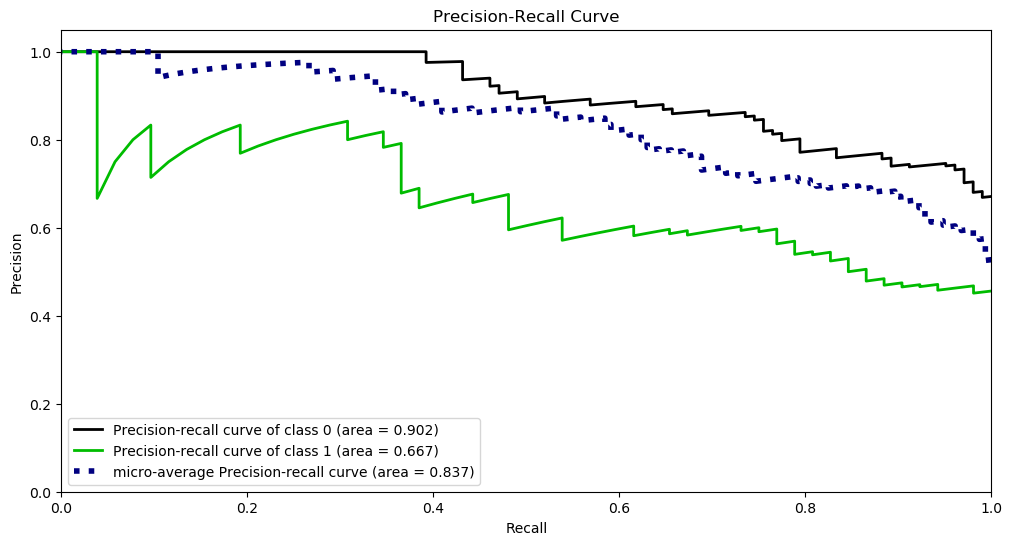

In [31]:
Y_test_probs = lda.predict_proba(X_test)
fig1 = plt.figure(figsize=(5,6))
axa = fig.add_subplot(121)
skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="ROC Curve", figsize=(12,6));

axb = fig.add_subplot(122)
skplt.metrics.plot_precision_recall_curve(y_test, Y_test_probs,
                       title="Precision-Recall Curve", figsize=(12,6));

plt.savefig('../figures/roc_and_precision_recall_curve.png', bbox_inches='tight')
plt.show()

## 4.3. Save Model

In [32]:
import pickle
#pickle.dump(grid_result, open(algo_name, 'wb'))
filename = '../models/diabdetect_lda_73'+'.pkl'  #  'diabdetect'+'.pkl'
pickle.dump(lda, open(filename, 'wb'))
print("Model saved .... ")
## load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))

Model saved .... 


In [33]:
loaded_model = pickle.load(open('../models/diabdetect_lda_73.pkl', 'rb'))
print("Model Loaded .... ")

Model Loaded .... 


# 5. Model Deployment

## 5.1. Insert Features line by line

In [36]:
model_path = "../models/diabdetect_lda_73.pkl"
prediction(loaded_model) 

============WELCOME TO=============
        Diabetes Prediction     
 
Please Enter Predictor variables
--------------------------------
Enter Pregnancies : 1
Enter Glucose  : 3
Enter BloodPressure : 3
Enter SkinThickness  : 2
Enter Insulin : 6
Enter BMI  : 6
Enter DiabetesPedigreeFunction : 5
Enter Age  : 5
--------------------------------

Result : This Patient is Not Prediabetic
============THANK YOU=============


## 5.2. Insert Feature as a list

> ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',  'DiabetesPedigreeFunction', 'Age']

In [35]:
features = [1, 126, 60, 0, 0, 30.1, 0.349, 47]
prediction2(loaded_model, features)

This Patient is Not Prediabetic


## 5.3. Real world Deployement

For real world use the model trained in this project we be deploy as :
* **Web app** with flask, streamlit and Django framework
* **Docker container**
* **API**

#####################################################################################################

#####################################################################################################

#####################################################################################################

* https://buildmedia.readthedocs.org/media/pdf/scikit-plot/stable/scikit-plot.pdf

Mito Installation Instructions: https://docs.trymito.io/getting-start...
👉 Mito YouTube Channel: https://youtube.com/channel/UCN9o_0m1...

housing : https://www.youtube.com/watch?v=gMoJIH0prL4&list=PLeo1K3hjS3uu7clOTtwsp94PcHbzqpAdg

60 projects : https://medium.com/coders-camp/60-python-projects-with-source-code-919cd8a6e512

mysql DB connection : https://www.youtube.com/watch?v=Bv2MBsq70RQ&list=PLZoTAELRMXVMd3RF7p-u7ezEysGaG9JmO

bureautic : https://www.youtube.com/c/KevinStratvert/playlists

statistic : https://www.pluralsight.com/guides/interpreting-data-using-statistical-models-python

interpret ML model : 

* https://towardsdatascience.com/shap-how-to-interpret-machine-learning-models-with-python-2323f5af4be9

* https://towardsdatascience.com/lime-how-to-interpret-machine-learning-models-with-python-94b0e7e4432e

AI & API : https://www.youtube.com/watch?v=56qQNcHJxyQ